## Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [6]:
data= pd.read_csv('startscan.csv')
data 

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [4]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


## Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [7]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

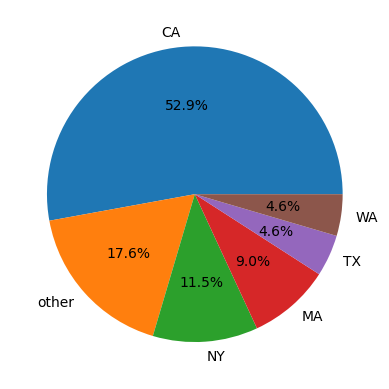

In [8]:

data['state'] = 'other' 
data.loc[(data['state_code']=='CA'), 'state'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'state'] = 'NY'
data.loc[(data['state_code'] =='MA'), 'state'] = 'MA' 
data.loc[(data['state_code'] == 'TX'), 'state'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'state'] = 'WA'
state_count = data['state'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

## Numeric data

In [9]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num=data.select_dtypes(include=numeric)
data_num.head()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,...,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,...,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,...,0,0,1,1,0,0,0,0,1.0000,1


## Categorical Data

In [10]:
data_cat=data.select_dtypes(include='object')
data_cat.head()


,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status,state
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired,CA
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired,CA
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired,CA
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired,CA
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed,CA


## Changing 'status' data value

In [11]:
data['status'] = data.status.map({'acquired':1, 'closed':0})

In [12]:
data['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int32

### Drop column labels

In [13]:
#labels status check similarity
for index, row in data.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [14]:
#drop feature
data.drop(["labels"], axis=1, inplace=True)

## Categorical Value Counting

In [15]:
cats = ['status', 'category_code', 'state_code']
for col in cats:
    print(f'Value counts for {col}:')
    print(data[col].value_counts())
    print()


Value counts for status:
status
1    597
0    326
Name: count, dtype: int64

Value counts for category_code:
category_code
software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: count, dtype: int64

Value coun

### Handling Missing Values

In [16]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null = null[null["% Missing Values"] > 0]
#print(null)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [17]:
#Filling age_first_milestone_year and age_first_milestone_year with value 0
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")

In [18]:
#dropping state_code.1 from dataset
data.drop(["state_code.1"], axis=1, inplace=True)

In [19]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null = null[null["% Missing Values"] > 0]
print(null)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)
data.isnull().sum()

            Null Values  % Missing Values
Unnamed: 6          493         53.412784
closed_at           588         63.705309


Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_adver

## Correlation heatmap

In [20]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Select only numeric columns before calculating correlation
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)
#data.corr()

                        Unnamed: 0  latitude  longitude  \
Unnamed: 0                1.000000  0.054726   0.023292   
latitude                  0.054726  1.000000   0.368475   
longitude                 0.023292  0.368475   1.000000   
age_first_funding_year   -0.004507 -0.046868  -0.014158   
age_last_funding_year    -0.116533 -0.041692  -0.000148   
relationships            -0.079950 -0.039198  -0.073197   
funding_rounds           -0.118456 -0.000659   0.022447   
funding_total_usd        -0.064169 -0.072941   0.017970   
milestones               -0.000338  0.017708  -0.016420   
is_CA                    -0.042446 -0.417471  -0.780122   
is_NY                     0.033485  0.205747   0.449871   
is_MA                     0.043021  0.318015   0.441031   
is_TX                    -0.021463 -0.423888   0.066199   
is_otherstate             0.002249  0.338590   0.257801   
is_software               0.001367 -0.001656   0.024857   
is_web                    0.007076 -0.009799  -0.022024 

In [21]:
data['age_first_milestone_year'] = data.age_first_milestone_year.astype(float)
data['age_last_milestone_year'] = data.age_last_milestone_year.astype(float)

## Box plots

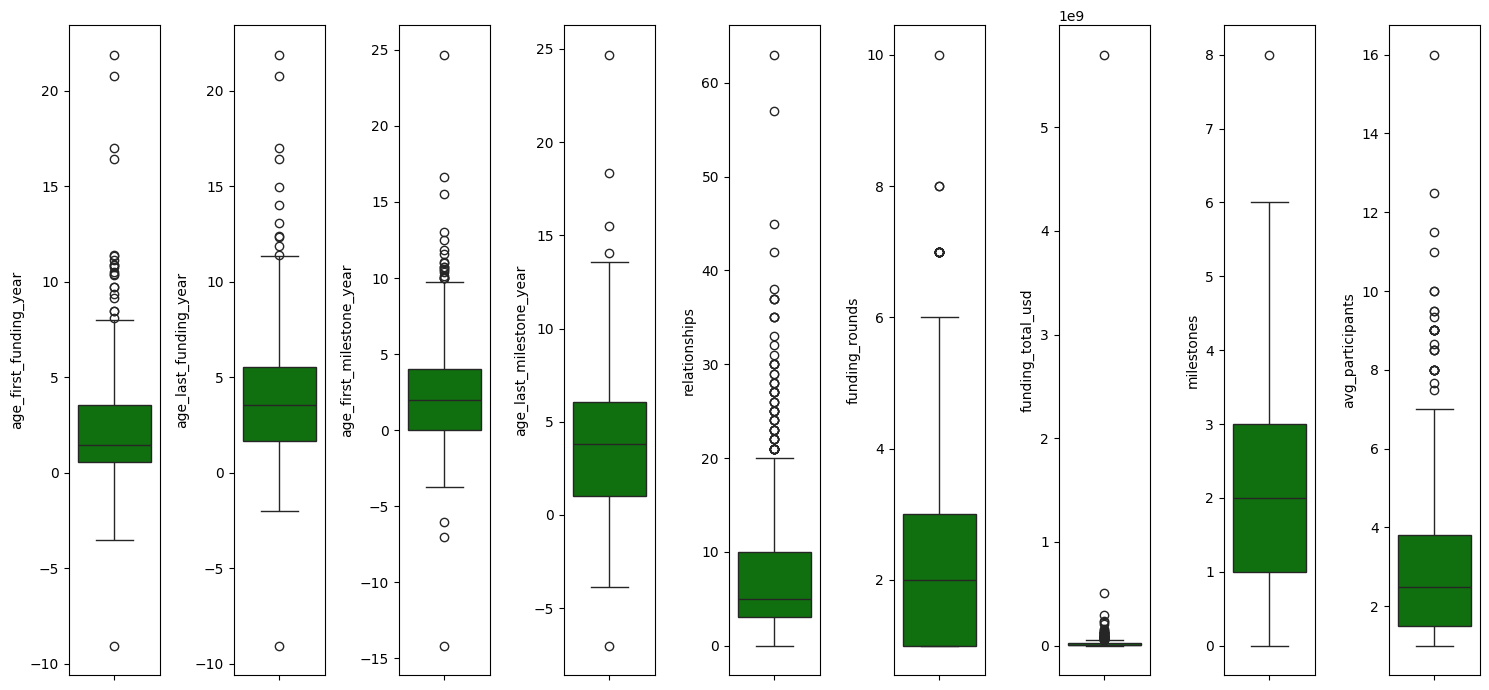

In [22]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=data[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

How many Startup are acquired or closed have?

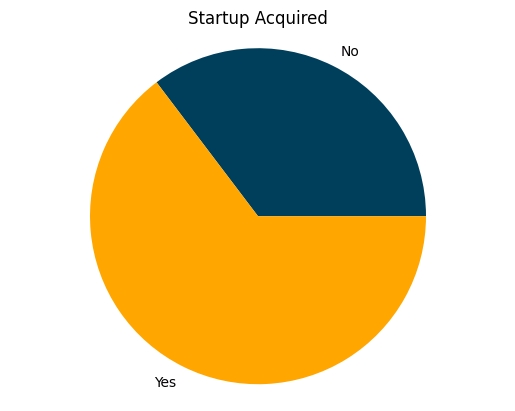

In [23]:
value_counts = data["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

Which category has the largest number of startup?

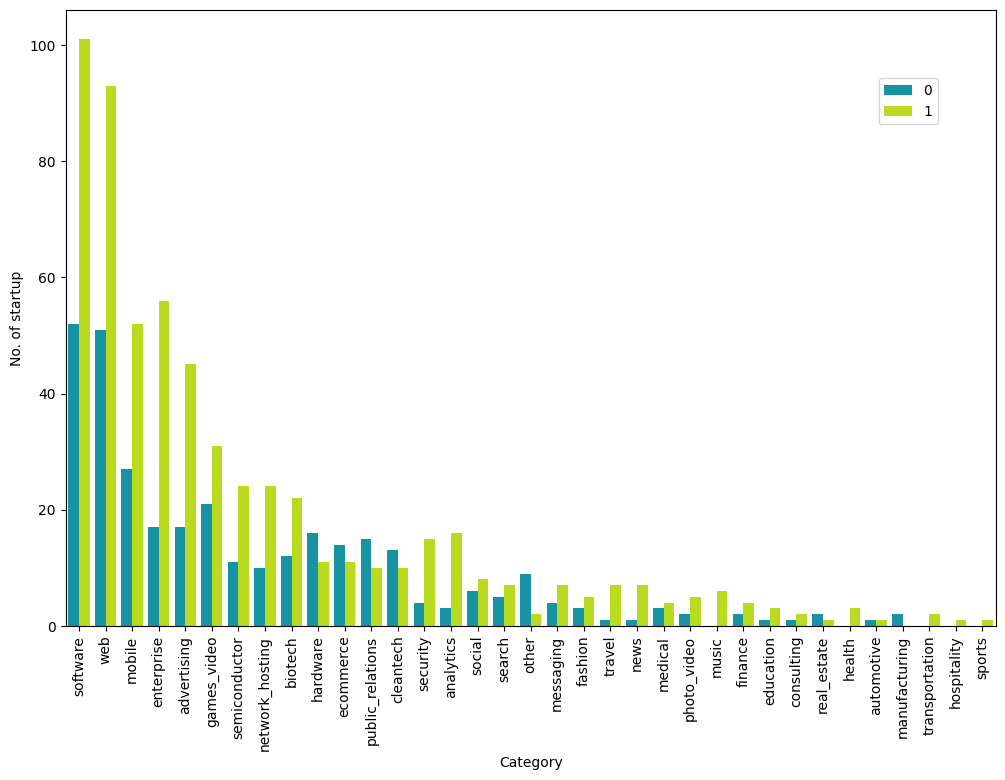

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=data, palette="nipy_spectral",
              order=data.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which Category has the largest nuber success rate ?

In [25]:
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate


,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


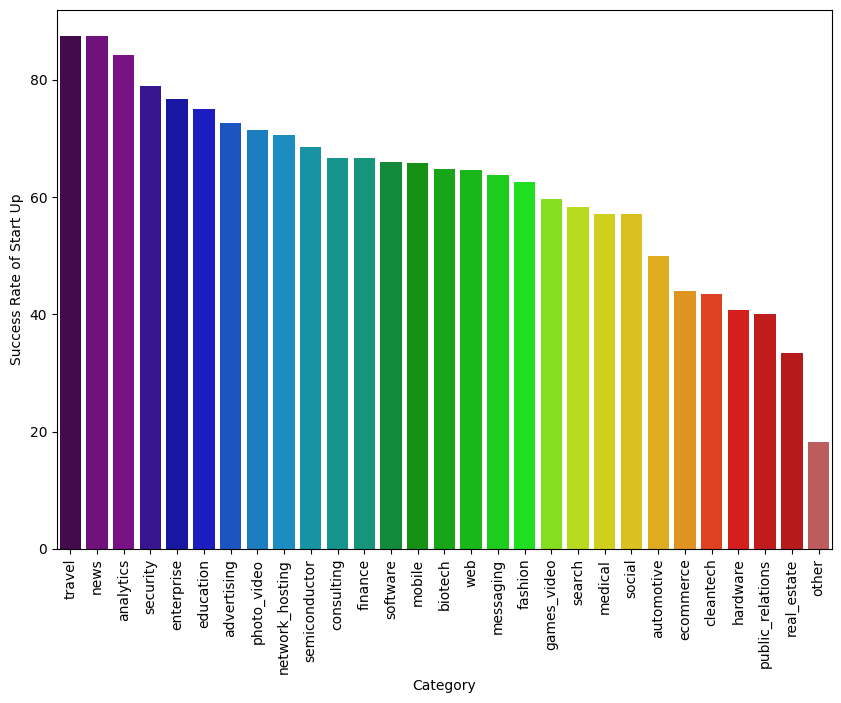

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,

                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

Which category having most number of total funding?

Which State having most number of Startup?

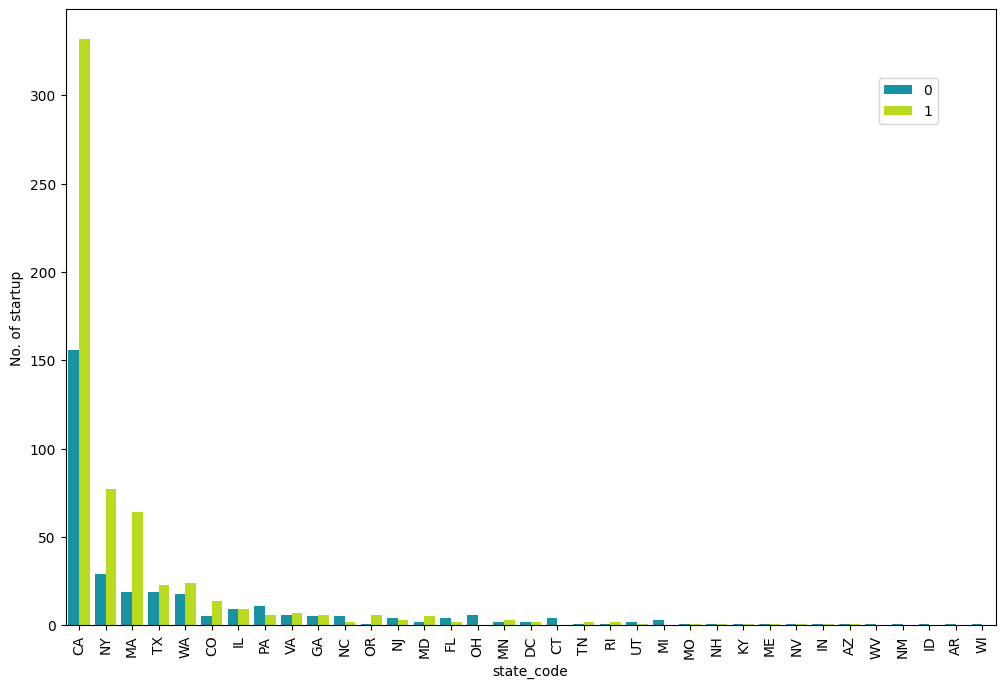

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=data, palette="nipy_spectral",
              order=data.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Duplicate Values

In [28]:
#check
duplicate = data[data.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


Negative value

In [29]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [30]:
#dropping negative values
df=data.drop(data[data.age_first_funding_year<0].index)
df=data.drop(data[data.age_last_funding_year<0].index)
df=data.drop(data[data.age_first_milestone_year<0].index)
df=data.drop(data[data.age_last_milestone_year<0].index)

## Outliers

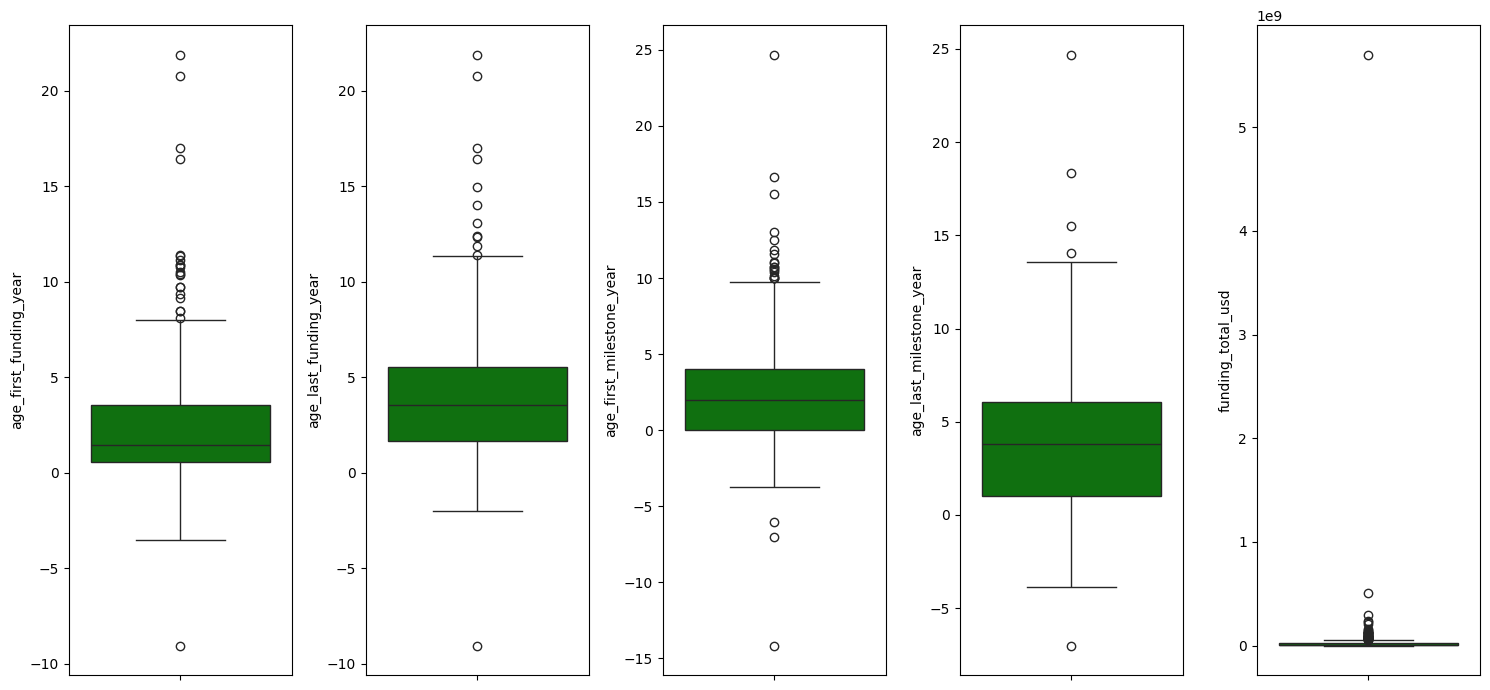

In [31]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()


# Create Model

In [32]:
#Check categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,category_code,object_id,state
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,music,c:6669,CA
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,enterprise,c:16283,CA
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,web,c:65620,CA
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,software,c:42668,CA
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,games_video,c:65806,CA


In [33]:
#new cells
data=data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)
data=data.drop(['latitude','longitude','Unnamed: 0', 'state_code', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
        'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
       'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'is_top500',
       'first_funding_at','last_funding_at',],axis=1)
print(data.columns)

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants',
       'status', 'state'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = data.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
print(X.columns)
y = data['status'] # Output/Dependent variable

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants',
       'state'],
      dtype='object')


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (646, 10)
Shape of the y Train : (646,)
Shape of the X test : (277, 10)
Shape of the y test : (277,)


In [37]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.7906137184115524


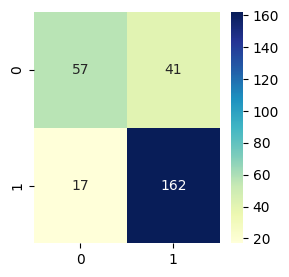

              precision    recall  f1-score   support

           0       0.77      0.58      0.66        98
           1       0.80      0.91      0.85       179

    accuracy                           0.79       277
   macro avg       0.78      0.74      0.76       277
weighted avg       0.79      0.79      0.78       277

------------------------------------------
ROC Curves              = 0.7433302930110591
Precision-Recall Curves = 0.8822146653831874


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train._get_numeric_data(),y_train)


y_pred_rf = rf.predict(X_test._get_numeric_data())

print("Training Accuracy :", rf.score(X_train._get_numeric_data(), y_train))
print("Testing Accuracy :", rf.score(X_test._get_numeric_data(), y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.7980295566502463
0.9050279329608939


In [40]:
from sklearn.metrics import precision_score
print(Precision_Recall_rfs)

0.8822146653831874


In [41]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']